<a href="https://colab.research.google.com/github/Lxyyxxx/Colab/blob/main/unary_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

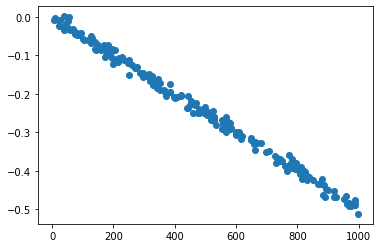

In [2]:
# create some data
n = 200

# X = np.random.normal(0, 10, (n, ))
X = np.random.uniform(0, 999, (n, ))  # 测试一下 X 很大，Y 很小
# X = np.random.rand(n)  # 如果不是同分布就不太好训练

W = -0.0005
b = 0.0001
noise = np.random.normal(0, .01, (n, ))  # 如果 noise 方差比较大的话也不太好训练
Y = W * X + b + noise  # f(x) = Wx + b

plt.scatter(X, Y)
plt.show()

In [3]:
# data split
n_train = int(.8 * n)
X_train, Y_train = X[:n_train], Y[:n_train]
X_test, Y_test = X[n_train:], Y[n_train:]

In [4]:
# model
model = keras.Sequential([
    keras.Input(shape=(1,)), 
    keras.layers.BatchNormalization(),  # 如果 X 很大，Y 很小，loss 会爆炸，需要 Normalization
    keras.layers.Dense(1) # without hidden layer
])
model.compile(loss='mse', optimizer='sgd')

In [ ]:
# train
epochs = 100
batch_size = 16

print('-' * 10, 'training', '-' * 10)

for epoch in range(epochs):
    verbose = 2 if epoch % 10 == 0 else 0
    history = model.fit(X_train, Y_train, batch_size=batch_size, verbose=verbose)

---------- training ----------
10/10 - 0s - loss: 1.8018 - 374ms/epoch - 37ms/step
10/10 - 0s - loss: 0.0037 - 14ms/epoch - 1ms/step
10/10 - 0s - loss: 9.0548e-04 - 12ms/epoch - 1ms/step
10/10 - 0s - loss: 9.9622e-04 - 27ms/epoch - 3ms/step
10/10 - 0s - loss: 0.0023 - 18ms/epoch - 2ms/step
10/10 - 0s - loss: 0.0023 - 17ms/epoch - 2ms/step
10/10 - 0s - loss: 0.0016 - 33ms/epoch - 3ms/step
10/10 - 0s - loss: 0.0017 - 34ms/epoch - 3ms/step
10/10 - 0s - loss: 9.8863e-04 - 22ms/epoch - 2ms/step
10/10 - 0s - loss: 0.0014 - 43ms/epoch - 4ms/step


In [6]:
# test
print('-' * 10, 'testing', '-' * 10)

loss = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('loss:', loss)

W_pred, b_pred = model.layers[-1].get_weights()
print('W_pred = ', W_pred, 'b_pred = ', b_pred)
print('W_true = ', W, 'b_true = ', b)

---------- testing ----------
3/3 [==============================] - 0s 4ms/step - loss: 9.5859e-05
loss: 9.585900988895446e-05
W_pred =  [[1.2225211]] b_pred =  [-0.08505019]
W_true =  -0.0005 b_true =  0.0001


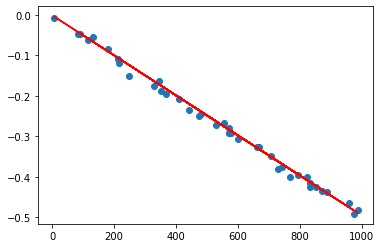

In [7]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='r')
plt.show()

---------- training ----------
10/10 - 0s - loss: 0.0604 - 405ms/epoch - 41ms/step
10/10 - 0s - loss: 0.0026 - 13ms/epoch - 1ms/step
10/10 - 0s - loss: 0.0025 - 14ms/epoch - 1ms/step
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
10/10 - 0s - loss: 0.0018 - 19ms/epoch - 2ms/step
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
10/10 - 0s - loss: 0.0014 - 15ms/epoch - 1ms/step
10/10 - 0s - loss: 0.0019 - 13ms/epoch - 1ms/step
10/10 - 0s - loss: 0.0029 - 18ms/epoch - 2ms/step
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step


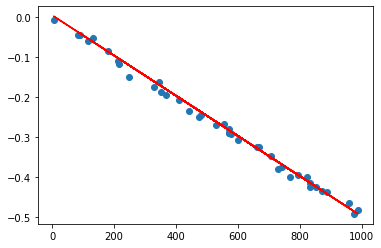

In [8]:
# 试一下层比较多能不能训练得比较好
# model
model = keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16),
    keras.layers.Dense(8),  # with 2 hidden layers
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='sgd')

# train
epochs = 100
batch_size = 16
print('-' * 10, 'training', '-' * 10)
for epoch in range(epochs):
    verbose = 2 if epoch % 10 == 0 else 0
    history = model.fit(X_train, Y_train, batch_size=batch_size, verbose=verbose)

# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='r')
plt.show()